In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from system_ode import PlotSolution, GetDataset, PlotPredictions
from machinelearning import main, plot_net_predictions
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

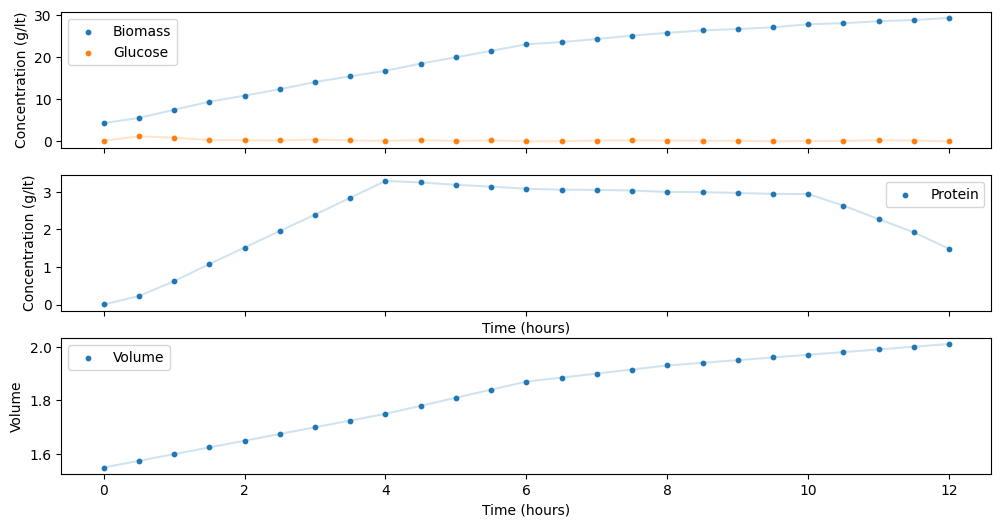

In [16]:
full_df = GetDataset(alpha=[0.3, 0.5, 0.1], noise=True)
PlotSolution(full_df)

In [17]:
train_df = full_df[full_df['RTime'] <= 4].copy()

In [ ]:
net_A, u_pred_A = main(train_df, full_df, num_epochs=30000, model='A')

Epoch 1/100000, Loss: 90.29, Loss Data: 44.80, Loss ODE: 45.48
mu_max: 0.75, alpha: 0.50, beta: 0.50
Epoch 101/100000, Loss: 13.17, Loss Data: 7.28, Loss ODE: 5.90
mu_max: 0.75, alpha: 0.41, beta: 0.50
Epoch 201/100000, Loss: 5.57, Loss Data: 1.71, Loss ODE: 3.86
mu_max: 0.75, alpha: 0.35, beta: 0.50
Epoch 301/100000, Loss: 3.51, Loss Data: 0.48, Loss ODE: 3.03
mu_max: 0.75, alpha: 0.30, beta: 0.50
Epoch 401/100000, Loss: 2.63, Loss Data: 0.23, Loss ODE: 2.41
mu_max: 0.75, alpha: 0.26, beta: 0.50
Epoch 501/100000, Loss: 3.55, Loss Data: 0.17, Loss ODE: 3.38
mu_max: 0.75, alpha: 0.25, beta: 0.50
Epoch 601/100000, Loss: 1.64, Loss Data: 0.10, Loss ODE: 1.54
mu_max: 0.75, alpha: 0.24, beta: 0.50
Epoch 701/100000, Loss: 1.50, Loss Data: 0.07, Loss ODE: 1.43
mu_max: 0.75, alpha: 0.25, beta: 0.50
Epoch 801/100000, Loss: 1.43, Loss Data: 0.05, Loss ODE: 1.38
mu_max: 0.75, alpha: 0.25, beta: 0.50
Epoch 901/100000, Loss: 0.86, Loss Data: 0.03, Loss ODE: 0.83
mu_max: 0.75, alpha: 0.25, beta: 0.5

In [ ]:
net_B, u_pred_B = main(train_df, full_df, num_epochs=30000, model='B')

Epoch 1/30000, Loss: 88.69, Loss Data: 44.08, Loss ODE: 44.61
mu_max: 0.75, alpha: 0.50, beta: 0.50
Epoch 101/30000, Loss: 69.31, Loss Data: 8.48, Loss ODE: 60.83
mu_max: 0.75, alpha: 0.37, beta: 0.50
Epoch 201/30000, Loss: 24.71, Loss Data: 16.43, Loss ODE: 8.28
mu_max: 0.75, alpha: 0.38, beta: 0.50
Epoch 301/30000, Loss: 15.09, Loss Data: 7.81, Loss ODE: 7.27
mu_max: 0.75, alpha: 0.41, beta: 0.50
Epoch 401/30000, Loss: 15.37, Loss Data: 8.03, Loss ODE: 7.33
mu_max: 0.75, alpha: 0.48, beta: 0.50
Epoch 501/30000, Loss: 71.41, Loss Data: 1.83, Loss ODE: 69.57
mu_max: 0.75, alpha: 0.54, beta: 0.50
Epoch 601/30000, Loss: 15.31, Loss Data: 6.91, Loss ODE: 8.39
mu_max: 0.75, alpha: 0.62, beta: 0.50
Epoch 701/30000, Loss: 5.07, Loss Data: 0.93, Loss ODE: 4.14
mu_max: 0.75, alpha: 0.64, beta: 0.50
Epoch 801/30000, Loss: 31.67, Loss Data: 24.18, Loss ODE: 7.49
mu_max: 0.75, alpha: 0.71, beta: 0.50
Epoch 901/30000, Loss: 22.73, Loss Data: 8.89, Loss ODE: 13.83
mu_max: 0.75, alpha: 0.71, beta: 0

KeyboardInterrupt: 

In [ ]:
net_C, u_pred_C = main(train_df, full_df, num_epochs=30000, model='C')

In [ ]:
print('Model A')
print(f' * mu_max = {net_A.mu_max.item():.4f}')
print(f' * alpha = {net_A.alpha.item():.4f}')

print('Model B')
print(f' * mu_max = {net_B.mu_max.item():.4f}')
print(f' * alpha = {net_B.alpha.item():.4f}')

print('Model C')
print(f' * mu_max = {net_C.mu_max.item():.4f}')
print(f' * alpha = {net_C.alpha.item():.4f}')
print(f' * beta = {net_C.beta.item():.4f}')

In [ ]:
val_A = u_pred_A[u_pred_A['RTime'] <= 4].copy()
val_B = u_pred_B[u_pred_B['RTime'] <= 4].copy()
val_C = u_pred_C[u_pred_C['RTime'] <= 4].copy()

# Calculate MSE for each model
mse_A_x = mean_squared_error(train_df['Biomass'], val_A['Biomass'])
mse_B_x = mean_squared_error(train_df['Biomass'], val_B['Biomass'])
mse_C_x = mean_squared_error(train_df['Biomass'], val_C['Biomass'])

mse_A_s = mean_squared_error(train_df['Glucose'], val_A['Glucose'])
mse_B_s = mean_squared_error(train_df['Glucose'], val_B['Glucose'])
mse_C_s = mean_squared_error(train_df['Glucose'], val_C['Glucose'])

mse_A_p = mean_squared_error(train_df['Protein'], val_A['Protein'])
mse_B_p = mean_squared_error(train_df['Protein'], val_B['Protein'])
mse_C_p = mean_squared_error(train_df['Protein'], val_C['Protein'])

print(f'MSE Biomass Model A: {mse_A_x:.4f}')
print(f'MSE Biomass Model B: {mse_B_x:.4f}')
print(f'MSE Biomass Model C: {mse_C_x:.4f}')
print()
print(f'MSE Glucose Model A: {mse_A_s:.4f}')
print(f'MSE Glucose Model B: {mse_B_s:.4f}')
print(f'MSE Glucose Model C: {mse_C_s:.4f}')
print()
print(f'MSE Protein Model A: {mse_A_p:.4f}')
print(f'MSE Protein Model B: {mse_B_p:.4f}')
print(f'MSE Protein Model C: {mse_C_p:.4f}')
print()
print(f'MSE Model A: {np.mean([mse_A_x, mse_A_s, mse_A_p]):.4f}')
print(f'MSE Model B: {np.mean([mse_B_x, mse_B_s, mse_B_p]):.4f}')
print(f'MSE Model C: {np.mean([mse_C_x, mse_C_s, mse_C_p]):.4f}')

In [ ]:
plt.figure(figsize=(15, 12))

# Plot Protein
plt.subplot(3, 1, 1)
plt.scatter(full_df['RTime'], full_df['Protein'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Protein'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Protein'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Protein'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Protein')
plt.title('Protein vs RTime')
plt.legend()

# Plot Biomass
plt.subplot(3, 1, 2)
plt.scatter(full_df['RTime'], full_df['Biomass'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Biomass'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Biomass'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Biomass'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Biomass')
plt.title('Biomass vs RTime')
plt.legend()

# Plot Glucose
plt.subplot(3, 1, 3)
plt.scatter(full_df['RTime'], full_df['Glucose'], color='black', s=10, label='Real Data')
plt.plot(val_A['RTime'], val_A['Glucose'], linestyle='-', color='r', label='Model A')
plt.plot(val_B['RTime'], val_B['Glucose'], linestyle='--', color='g', label='Model B')
plt.plot(val_C['RTime'], val_C['Glucose'], linestyle='-.', color='b', label='Model C')
plt.xlabel('RTime')
plt.ylabel('Glucose')
plt.title('Glucose vs RTime')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plot_net_predictions(full_df=full_df, train_df=train_df, u_pred=u_pred_A)

In [ ]:
sim_pred_df = GetDataset(mumax = net.mu_max.item(), alpha = net.alpha.item())
PlotPredictions(train_df, sim_pred_df)